In [1]:
%matplotlib inline

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.datasets import make_blobs, load_iris, make_circles, fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA, TruncatedSVD

# Dimensionality Reduction

In [6]:
iris = load_iris()

In [7]:
attributes, target = iris['data'], iris['target']

When we have Dimensionality Reduction, we fit it to the training data, not to the whole dataset.

<b>PCA</b>

PCA is unsupervised method. It does not have target.

In [10]:
pca = PCA()

In [11]:
pca.fit(attributes)

PCA()

In [12]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [13]:
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [14]:
transformed_attr = pca.transform(attributes)

In [16]:
transformed_attr.shape, attributes.shape

((150, 4), (150, 4))

The basis has been changed.

In [17]:
transformed_attr

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
         2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
         9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
         1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
        -7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
        -6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
        -2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
        -4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
        -4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
        -2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
        -5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
        -1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

In [18]:
transformed_attr.std(axis = 0)

array([2.04940319, 0.49097143, 0.27872586, 0.1538707 ])

In [19]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 , 0.02367619])

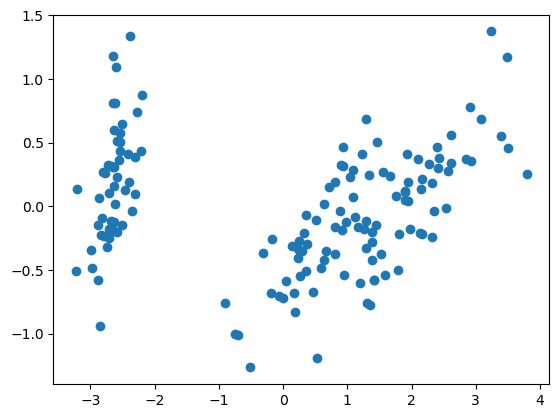

In [21]:
plt.scatter(transformed_attr[:, 0], transformed_attr[:, 1])
plt.show()

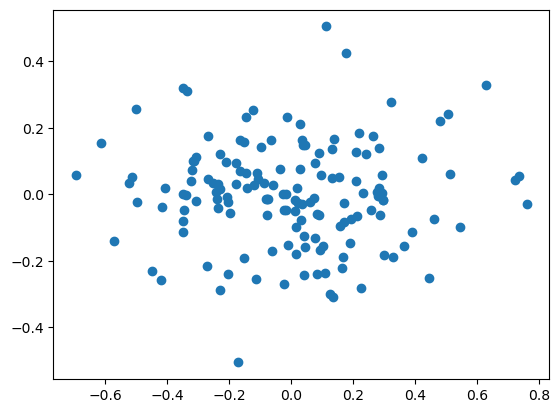

In [22]:
plt.scatter(transformed_attr[:, 2], transformed_attr[:, 3])
plt.show()

<b>PCA -> n_components</b>

In [23]:
pca = PCA(n_components = 2)

In [24]:
pca.fit(attributes)

PCA(n_components=2)

In [25]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [26]:
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [27]:
transformed_attr = pca.transform(attributes)

In [28]:
transformed_attr.shape, attributes.shape

((150, 2), (150, 4))

In [29]:
transformed_attr

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [30]:
transformed_attr.std(axis = 0)

array([2.04940319, 0.49097143])

In [31]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294])

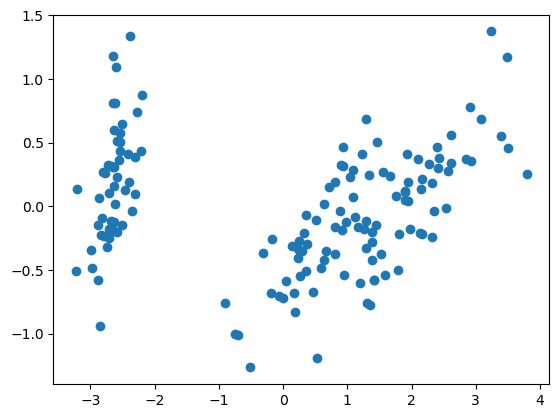

In [32]:
plt.scatter(transformed_attr[:, 0], transformed_attr[:, 1])
plt.show()

<b>Explained variance</b>

In [33]:
pca = PCA()

In [34]:
pca.fit(attributes)

PCA()

In [35]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [36]:
transformed_attr = pca.transform(attributes)

In [38]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 , 0.02367619])

In [39]:
attributes.var(axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [40]:
pca.explained_variance_.sum()

4.572957046979804

In [41]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [42]:
pca.explained_variance_ratio_.sum()

1.0

In [44]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

<b>setting the n_components to a value of explained variance</b>

In [46]:
pca = PCA(n_components = 0.98)

In [47]:
pca.fit(attributes)

PCA(n_components=0.98)

In [48]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

In [49]:
transformed_attr = pca.transform(attributes)

In [50]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294, 0.0776881 ])

In [53]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [56]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782])

n_components = 0.95

In [57]:
pca = PCA(n_components = 0.95)

In [58]:
pca.fit(attributes)

PCA(n_components=0.95)

In [59]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [60]:
transformed_attr = pca.transform(attributes)

In [61]:
transformed_attr.var(axis = 0)

array([4.20005343, 0.24105294])

In [62]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [63]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521])

<b>PCA on Goussian blob dataset</b>

In [95]:
x = np.random.normal(3.5, scale = 3, size = 500)

In [96]:
y = np.random.normal(2.4, scale = 2, size = 500)

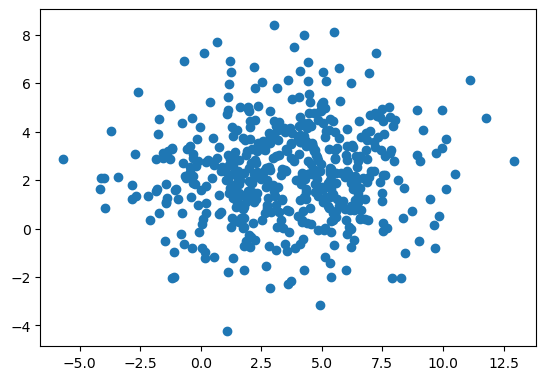

In [97]:
plt.scatter(x, y)
plt.gca().set_aspect('equal')
plt.show()

In [99]:
points = np.array([x, y]).reshape(500, 2)
points[:10]

array([[-1.80973508,  8.33086455],
       [ 5.85940839,  5.36316382],
       [ 7.46781616,  5.35373802],
       [ 4.59656222,  4.26870913],
       [ 0.47163606, -0.42420605],
       [ 6.7961046 ,  3.41920001],
       [ 0.20023281,  1.59644419],
       [ 5.32363962,  3.59482376],
       [ 1.66345765,  0.81564067],
       [ 6.92423669,  4.84133643]])

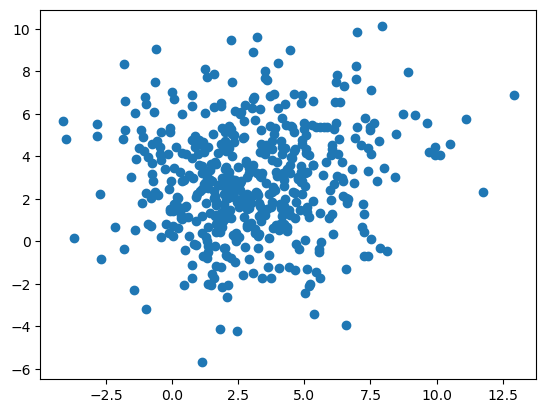

In [100]:
plt.scatter(points[:, 0], points[:, 1])

In [104]:
results = points @ np.array([[1, 0.5], [0.6, 1]])

In [105]:
results[:10]

array([[ 3.18878365,  7.42599701],
       [ 9.07730668,  8.29286802],
       [10.68005897,  9.0876461 ],
       [ 7.15778769,  6.56699023],
       [ 0.21711243, -0.18838802],
       [ 8.8476246 ,  6.81725231],
       [ 1.15809932,  1.6965606 ],
       [ 7.48053388,  6.25664357],
       [ 2.15284205,  1.64736949],
       [ 9.82903854,  8.30345477]])

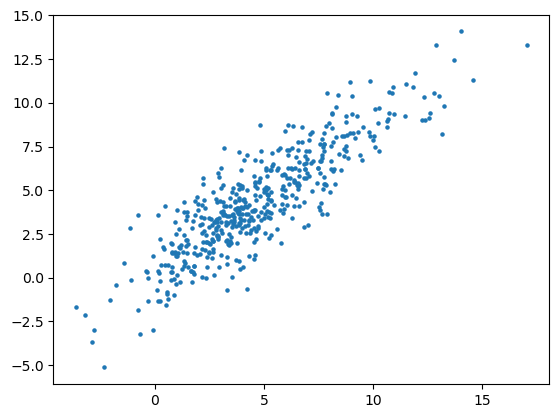

In [110]:
plt.scatter(results[:, 0], results[:, 1], s = 5)

In [111]:
data = results.copy()

In [113]:
center = data.mean(axis = 0)
center

array([4.70074237, 4.3488612 ])

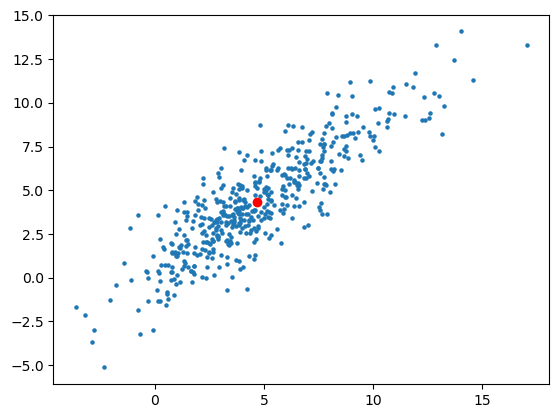

In [115]:
plt.scatter(results[:, 0], results[:, 1], s = 5)
plt.scatter(center[0], center[1], c = 'red')
plt.show()

In [118]:
np.corrcoef(data, rowvar = False)

array([[1.        , 0.87198735],
       [0.87198735, 1.        ]])

In [119]:
np.cov(data, rowvar = False)

array([[10.13922248,  8.33975348],
       [ 8.33975348,  9.0215551 ]])

The covariation of a variable with itself is its dispersion of its values / variance.

It is a symmetric matrix, which means that its eigenvectors are orthogonal. However, they are not normalized i.e. their norm is different (the norm of the first eigenvector is greater than the norm of the second, which is greater than the norm of the third, and so on). 

The covariation matrix is converted to to a diagonal matrix, where all the elements outside the main diagonal are zero.

\begin{pmatrix}
\lambda_1 & 0 & 0 & \dots & 0 \\
0 & \lambda_2 & 0 & \dots & 0 \\
0 & 0 & \lambda_3 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & \lambda_n
\end{pmatrix}

In [121]:
covariance_matrix = np.cov(data - center, rowvar = False) # by subtracting the mean, we center the data

In [122]:
np.linalg.eig(covariance_matrix)

EigResult(eigenvalues=array([17.93884459,  1.221933  ]), eigenvectors=array([[ 0.7303624 , -0.68305985],
       [ 0.68305985,  0.7303624 ]]))

Eigenvalues correspond to the values of the diagonal in a diagonal matrix, the other elements are zeros. Eigenvectors form the basis for the transformation that diagonalizes the original matrix. 

In [124]:
# checking if they are orthogonal -> they are
np.linalg.eig(covariance_matrix).eigenvectors

array([[ 0.7303624 , -0.68305985],
       [ 0.68305985,  0.7303624 ]])

In [126]:
# scalar product -> it is 0, so they are orthogonal
np.dot(np.linalg.eig(covariance_matrix).eigenvectors[:, 0], np.linalg.eig(covariance_matrix).eigenvectors[:, 1])

0.0

In [128]:
pca.fit(data).components_ # PCs correspond to the eigenvectors

array([[ 0.7303624 ,  0.68305985],
       [-0.68305985,  0.7303624 ]])

pca.transform -> transforms the original data according to the new basis vectors (the principal components are the new basis vectors).

In [130]:
transformed_data = pca.transform(data)

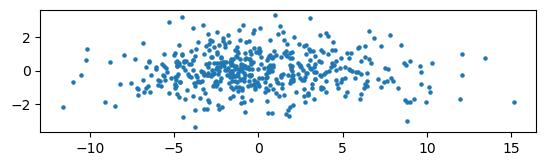

In [132]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s = 5)
plt.gca().set_aspect('equal')
plt.show()

These are the eigen coordinates of the dataset.

<b>PC1</b>

In [134]:
pca = PCA(n_components = 1)

In [135]:
pca.fit(data)

PCA(n_components=1)

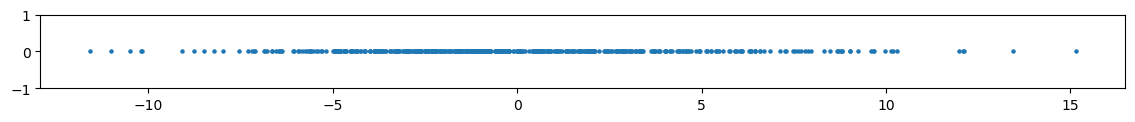

In [144]:
plt.figure(figsize = (14, 10))
plt.scatter(transformed_data[:, 0], [0] * len(data), s = 5)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal')
plt.show()

Some information is lost, but it is minimal.

PCA is very useful when we have big data. it is not applicable to sparse matrices.

PCA makes singular value decomposition.

In [148]:
texts = fetch_20newsgroups()['data'][:50]

In [152]:
tfidf = TfidfVectorizer()

In [154]:
tfidf.fit(texts)

TfidfVectorizer()

In [155]:
tfidf_result = tfidf.transform(texts)

In [156]:
tfidf_result

<50x3612 sparse matrix of type '<class 'numpy.float64'>'
	with 7607 stored elements in Compressed Sparse Row format>

In [157]:
tfidf_dr = PCA(n_components = 300)

But PCA could not be used here and will give an error, because it cannot work on sparse matrices.

Another method can be used, but the ordering from the highest to the lowest explained variance will be lost.